In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pygeohash as gh # can be installed with !pip install pygeohash
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
# Import and inspect data

try:
    os.chdir('./data')
except:
    pass

init_data = pd.read_csv('kc_house_data.csv')
os.chdir('./')

display(init_data.head())
display(init_data.describe())
init_data.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
# Check for nan values

for column in init_data.columns:
    nan_total = init_data[column].isna().sum()
    if nan_total > 0:
        print(f'''{column} has {nan_total} nan values in it, accounting for {round(100*nan_total/init_data.shape[0], 2)}% of that feature.''')
    else:
        continue

waterfront has 2376 nan values in it, accounting for 11.0% of that feature.
view has 63 nan values in it, accounting for 0.29% of that feature.
yr_renovated has 3842 nan values in it, accounting for 17.79% of that feature.


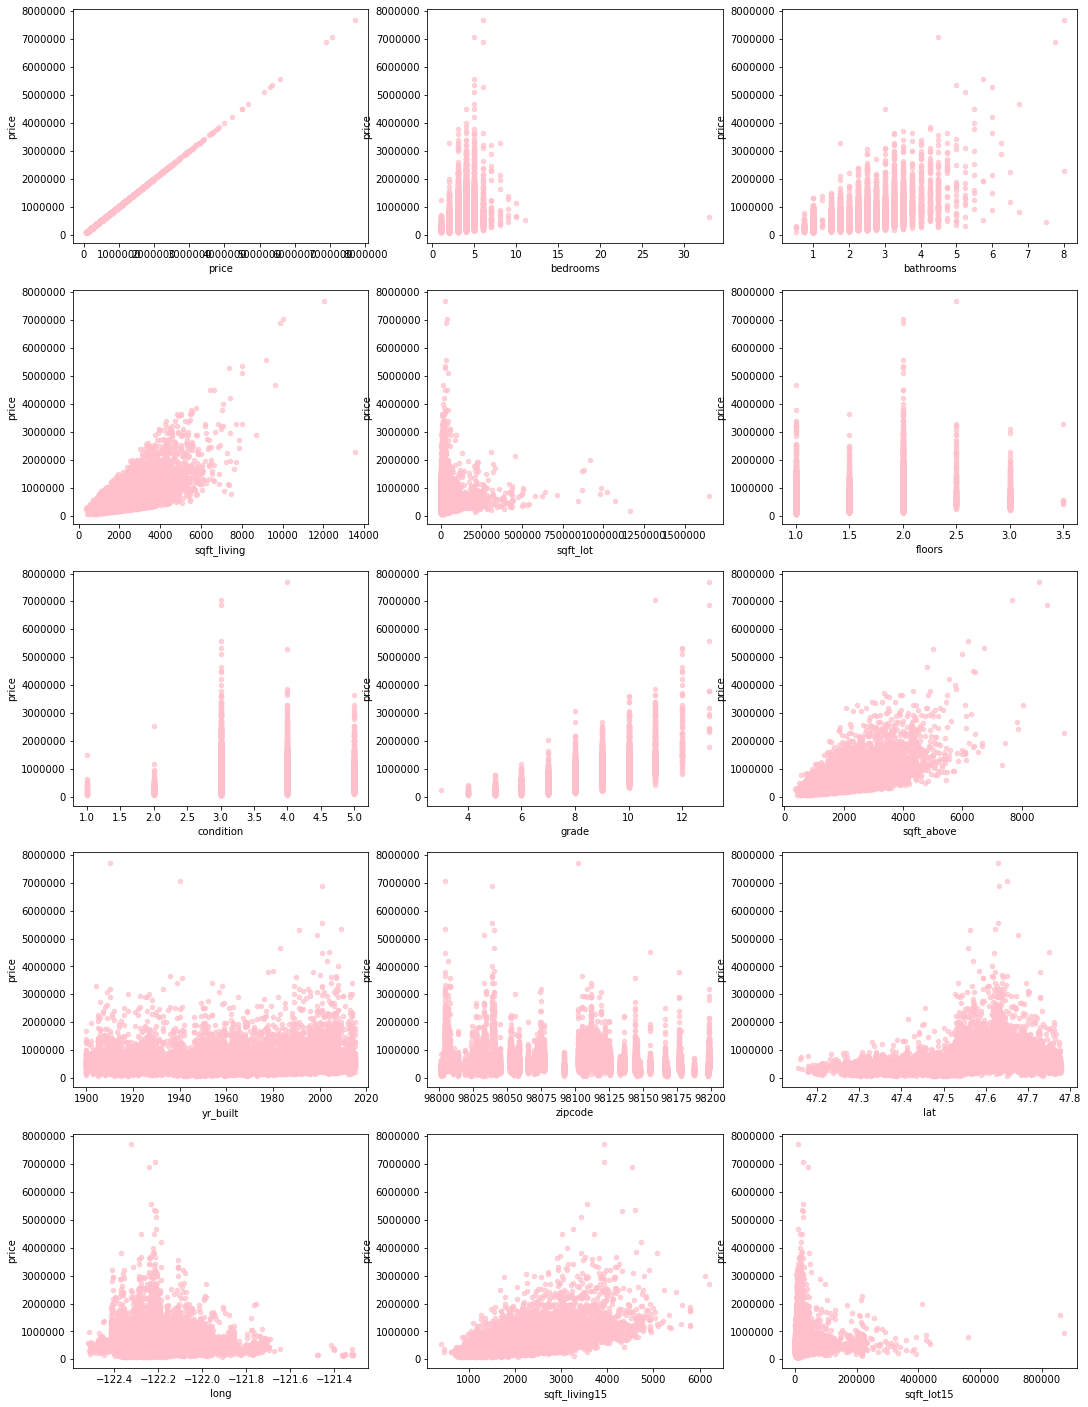

In [4]:
# Visually inspect data after dropping problem/extra columns

init_data.drop(['id',
                'date',
                'waterfront',
                'view',
                'yr_renovated',
                'sqft_basement'], axis=1, inplace=True)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18,25))

for xcol, ax in zip(init_data.columns, axes.flatten()):
    init_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.7, color='pink')

In [5]:
# transform lattitude and longitude into geohash values, then drop them, as well as zipcode

init_data['geohash'] = init_data.apply(lambda x: gh.encode(x.lat,
                                                           x.long,
                                                           precision=6), axis=1)

init_data.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)

In [6]:
# List the continuous and the categorical values

cont = ['sqft_living',
       'sqft_lot',
       'sqft_above',
       'sqft_living15',
       'sqft_lot15']
cat = ['bedrooms',
      'bathrooms',
      'floors',
      'condition',
      'grade',
      'yr_built',
      'geohash']

In [7]:
# Identify and deal with outliers, create a new DF

display(init_data.loc[init_data['bedrooms'] == init_data['bedrooms'].max()])
for column in cont:
    print(column.upper())
    print('----------------------------------------------')
    print(list(init_data[column].nsmallest(10).value_counts().index))
    print(list(init_data[column].nlargest(10).value_counts().index))
    print('----------------------------------------------')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,geohash
15856,640000.0,33,1.75,1620,6000,1.0,5,7,1040,1947,1330,4700,c23p23


SQFT_LIVING
----------------------------------------------
[420, 430, 380, 410, 440, 390, 460, 370, 470]
[8020, 8670, 9640, 8010, 8000, 10040, 9890, 13540, 12050, 9200]
----------------------------------------------
SQFT_LOT
----------------------------------------------
[649, 638, 572, 635, 520, 651, 600, 609, 675]
[871200, 1651359, 1024068, 920423, 1164794, 982278, 982998, 881654, 1074218]
----------------------------------------------
SQFT_ABOVE
----------------------------------------------
[420, 430, 380, 410, 440, 390, 460, 370, 470]
[7850, 7320, 8860, 7420, 8570, 6720, 7880, 8020, 9410, 7680]
----------------------------------------------
SQFT_LIVING15
----------------------------------------------
[460, 620, 700, 690, 399, 670]
[5790, 6110, 5610, 6210, 5600]
----------------------------------------------
SQFT_LOT15
----------------------------------------------
[750, 748, 651, 755, 660, 659]
[392040, 425581, 411962, 560617, 434728, 422967, 438213, 858132, 871200]
--------------

In [8]:
# I'm going to drop the largest value in the bedrooms column, as well as the ten largest
# and smallest values in each of the continuous data columns

In [10]:
sqft_living_min = (list(init_data['sqft_living'].nsmallest(10).value_counts().index)+
                   list(init_data['sqft_living'].nlargest(10).value_counts().index))
sqft_lot_min = (list(init_data['sqft_lot'].nsmallest(10).value_counts().index)+
                list(init_data['sqft_lot'].nlargest(10).value_counts().index))
sqft_above_min = (list(init_data['sqft_above'].nsmallest(10).value_counts().index)+
                  list(init_data['sqft_above'].nlargest(10).value_counts().index))
sqft_lot15_min = (list(init_data['sqft_lot15'].nsmallest(10).value_counts().index)+
                  list(init_data['sqft_lot15'].nlargest(10).value_counts().index))
sqft_living15_min = (list(init_data['sqft_living15'].nsmallest(10).value_counts().index)+
                     list(init_data['sqft_living15'].nlargest(10).value_counts().index))

drop_list = [sqft_living_min,
             sqft_lot_min,
             sqft_above_min,
             sqft_living15_min,
             sqft_lot15_min]
    
q = """SELECT *
       FROM init_data
       WHERE bedrooms != 33"""

df = pysqldf(q)
counter = 0

for n, column in enumerate(cont):
    for i in drop_list[n]:
        counter += 1
        q1 = f"""SELECT *
                 FROM df
                 WHERE {column} != {i}"""
        df = pysqldf(q1)       

print(f'This took {counter} iterations.')

for column in cont:
    print('----------------------------------------------')
    print(column.upper())
    if (max(list(init_data[column].nsmallest(10).value_counts().index)) <
        min(list(df[column].nsmallest(10).value_counts().index))):
        print('Minimum values successfully dropped')
    else:
        print('ERROR: MINIMUM VALUES NOT DROPPED')
    if (max(list(init_data[column].nlargest(10).value_counts().index)) >
        min(list(df[column].nlargest(10).value_counts().index))):
        print('Maximum values successfully dropped')
    else:
        print('ERROR: MAXIMUM VALUES NOT DROPPED')
    print('----------------------------------------------')

This took 82 iterations.
----------------------------------------------
SQFT_LIVING
Minimum values successfully dropped
Maximum values successfully dropped
----------------------------------------------
----------------------------------------------
SQFT_LOT
Minimum values successfully dropped
Maximum values successfully dropped
----------------------------------------------
----------------------------------------------
SQFT_ABOVE
Minimum values successfully dropped
Maximum values successfully dropped
----------------------------------------------
----------------------------------------------
SQFT_LIVING15
Minimum values successfully dropped
Maximum values successfully dropped
----------------------------------------------
----------------------------------------------
SQFT_LOT15
Minimum values successfully dropped
Maximum values successfully dropped
----------------------------------------------


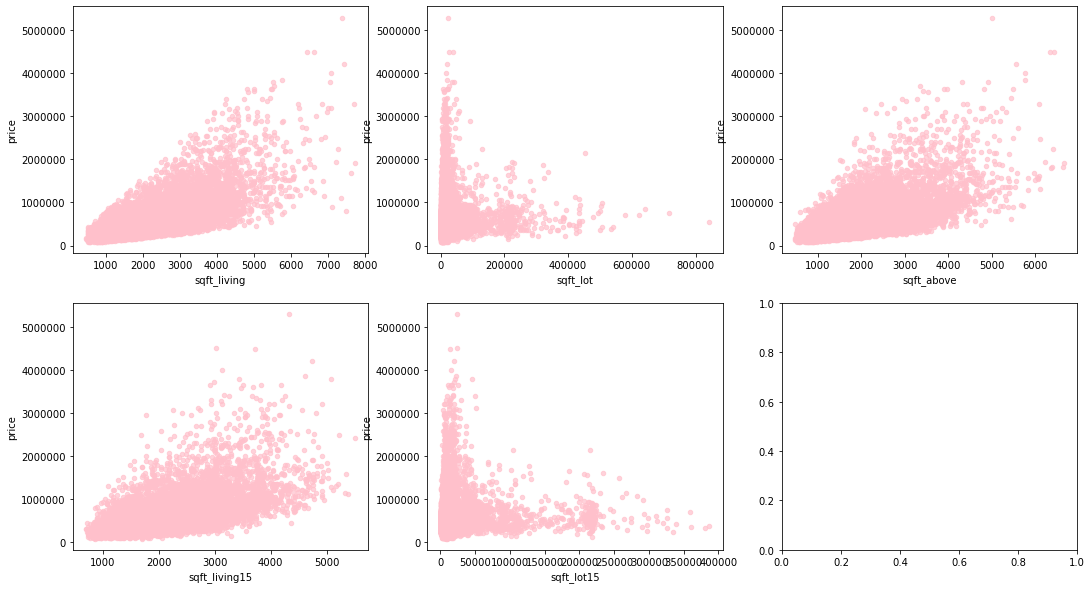

In [11]:
# Visually reinspect data. Should look much better

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

for xcol, ax in zip(cont, axes.flatten()):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.7, color='pink')

##### Itinerary:

* Dummify variables
* Check for multicollinearity
* Check for normality with histogram
* Check for homoscedasticity
* Transform continuous data accordingly
* Run tests to see which variables are best predictors

In [12]:
# The above variables look pretty linear!

cat

['bedrooms',
 'bathrooms',
 'floors',
 'condition',
 'grade',
 'yr_built',
 'geohash']

In [13]:
# Dummify the categorical variables

cat_pre_list = ['bdrm', 'bath', 'flrs', 'cond', 'grade', 'built', 'geo']

dummies = pd.get_dummies(df[cat], prefix=cat_pre_list, columns=cat, drop_first=True)

interim = df.drop(cat, axis=1)

needs_pre = pd.concat([interim, dummies], axis = 1)

needs_pre.shape

(21517, 3019)

In [14]:
# Check for multicollinearity

multicorr = needs_pre[cont].corr().abs().stack().reset_index().sort_values(0, ascending=False)
multicorr['pairs'] = list(zip(multicorr.level_0, multicorr.level_1))
multicorr.set_index(['pairs'], inplace=True)
multicorr.drop(['level_1', 'level_0'], axis=1, inplace=True)
multicorr.columns= ['cc']
multicorr.drop_duplicates(inplace=True)
multicorr[(multicorr.cc>.75) & (multicorr.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.872265
"(sqft_lot, sqft_lot15)",0.775344
"(sqft_living, sqft_living15)",0.758780


In [15]:
# I hate to drop more than half my continuous variables, but that's what I need to do. I could
# maintain three of the five, but I have a hunch that sqft_living is going to be more important
# than either of the '15' columns, so I'll hold onto that one.

try:
    needs_pre.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
except:
    pass

display(needs_pre.shape) # Should be three less than above

(21517, 3016)

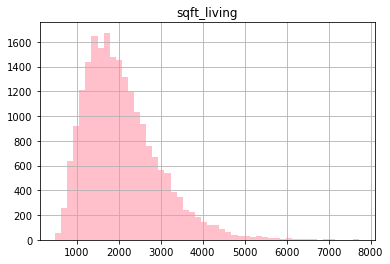

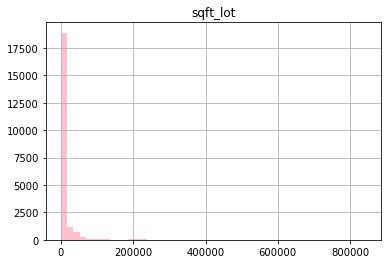

In [16]:
# Check for normality of variables, then of residuals

for column in ['sqft_living', 'sqft_lot']:
    needs_pre.hist(column=column, bins=50, color='pink')